In [3]:
import statsmodels.api as sm
import pandas as pd
import sqlite3

In [5]:
conn = sqlite3.connect('D:/Documents/GitHub/Statistical-Modelling-Project/notebooks/Montreal_POI_BIKE.db')

#Reading tables into pandas DataFrames
montreal_data = pd.read_sql_query("SELECT * FROM montreal_df;", conn)
foursquare_data = pd.read_sql_query("SELECT * FROM foursquare_data;", conn)
yelp_data = pd.read_sql_query("SELECT * FROM yelp_data;", conn)

# Close the database connection
conn.close()

In [6]:
#montreal_data.head()
#foursquare_data.head()
yelp_data.head()


,Name,Rating,Address,Latitude,Longitude
0,Resto Keela,4.9,"1237 Rue Atateken, Montreal, QC H2L 3K9, Canada",45.516926,-73.564257
1,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada",45.516926,-73.564257
2,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C...",45.516926,-73.564257
3,Cadet,4.5,"1431 Boulevard Saint-Laurent, Montreal, QC H2X...",45.516926,-73.564257
4,Le Saint-Bock,3.8,"1749 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca...",45.516926,-73.564257


In [7]:
montreal_data = montreal_data.rename(columns={
    'name': 'Bike Station Name',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'free_bikes': 'Free_Bikes',
    'empty_slots': 'Empty_Slots'
    })

In [8]:
foursquare_data.rename(columns={
    'Name': 'Venue Name'
      })

,Venue Name,Address,Latitude,Longitude,Categories,Rating,TotalRatings
0,Cadet,1431 Saint-Laurent Blvd (entre De Maisonneuve ...,45.510388,-73.564365,"['Restaurant', 'Wine Bar']",None,None
1,L'Express,"3927 Saint-Denis Rue (entre Duluth & Roy), Mon...",45.520186,-73.574269,"['Bistro', 'French Restaurant']",None,None
2,Le Club Espresso Bar,"3801 Saint-Denis Rue, Montréal QC H2W 2M4",45.519481,-73.572648,['Café'],None,None
3,Bouillon Bilk,1595 Saint-Laurent Blvd (entre De Maisonneuve ...,45.511038,-73.565936,['Restaurant'],None,None
4,Pourquoi Pas Espresso Bar,1447 Atateken Rue (entre De Maisonneuve & Ste-...,45.517964,-73.557776,"['Café', 'Coffee Shop', 'Restaurant']",None,None
...,...,...,...,...,...,...,...
7987,Pizza 2 pour 1,"288 Blvd de la Concorde Ouest, Laval QC H7N 1J1",45.565278,-73.700936,"['Pizzeria', 'Fast Food Restaurant']",None,None
7988,Restaurant le Cartier,"319 Cartier Blvd O (Ampère), Laval QC H7N 2J4",45.555011,-73.702614,['Steakhouse'],None,None
7989,Café Bistro Il Momento,"180 Blvd de la Concorde Ouest, Laval QC H7N 1H9",45.565933,-73.699552,"['Bistro', 'Café', 'Coffee Shop']",None,None
7990,Rôtisseries Benny & Au Coq,"54 Cartier Blvd O, Laval QC",45.559380,-73.689673,['Fried Chicken Joint'],None,None


In [9]:
yelp_data.rename(columns={
    'Name': 'Venue Name'
      })

,Venue Name,Rating,Address,Latitude,Longitude
0,Resto Keela,4.9,"1237 Rue Atateken, Montreal, QC H2L 3K9, Canada",45.516926,-73.564257
1,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada",45.516926,-73.564257
2,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C...",45.516926,-73.564257
3,Cadet,4.5,"1431 Boulevard Saint-Laurent, Montreal, QC H2X...",45.516926,-73.564257
4,Le Saint-Bock,3.8,"1749 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca...",45.516926,-73.564257
...,...,...,...,...,...
14378,Subway,1.8,"7420 Rue Sherbrooke O, Montreal, QC H4B 1R7, C...",45.457509,-73.639485
14379,Kammys,3.3,"30 Avenue Westminster N, Montréal-Ouest, QC H4...",45.457509,-73.639485
14380,Café Mia,3.0,"6926 Rue Sherbrooke O, Suite 1, Montreal, QC H...",45.457509,-73.639485
14381,McDonald's,2.9,"7270 Rue Saint-Jacques O, Montreal, QC H4B 1W1...",45.457509,-73.639485


In [10]:
# Merge montreal_data with foursquare_data
merged_df = pd.merge(montreal_data, foursquare_data, on=['Latitude', 'Longitude'], how='left')

# Merge montreal_data with yelp_data
merged_df = pd.merge(merged_df, yelp_data, on=['Latitude', 'Longitude'], how='left')

In [11]:
merged_df.isna().sum()

Bike Station Name        0
Latitude                 0
Longitude                0
Free_Bikes               0
Empty_Slots              0
Name_x               14936
Address_x            14936
Categories           14936
Rating_x             14936
TotalRatings         14936
Name_y                 553
Rating_y               553
Address_y              553
dtype: int64

In [12]:
# Drop columns with no values (all null)
columns_to_drop = ['Name_x', 'Address_x', 'Categories', 'Rating_x', 'TotalRatings']
merged_df = merged_df.drop(columns=columns_to_drop)

# Display the remaining columns
print(merged_df.columns)

Index(['Bike Station Name', 'Latitude', 'Longitude', 'Free_Bikes',
       'Empty_Slots', 'Name_y', 'Rating_y', 'Address_y'],
      dtype='object')


In [13]:
merged_df

,Bike Station Name,Latitude,Longitude,Free_Bikes,Empty_Slots,Name_y,Rating_y,Address_y
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Resto Keela,4.9,"1237 Rue Atateken, Montreal, QC H2L 3K9, Canada"
1,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada"
2,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C..."
3,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Cadet,4.5,"1431 Boulevard Saint-Laurent, Montreal, QC H2X..."
4,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Le Saint-Bock,3.8,"1749 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca..."
...,...,...,...,...,...,...,...,...
14931,Lincoln / du Fort,45.493065,-73.583827,5,14,NaN,NaN,NaN
14932,15e avenue / Dandurand,45.554787,-73.574259,7,16,NaN,NaN,NaN
14933,Molson / Beaubien,45.549778,-73.591321,4,19,NaN,NaN,NaN
14934,Montmorency / du bon Pasteur,45.553292,-73.710692,0,27,NaN,NaN,NaN


In [14]:
merged_df.isna().sum()

Bike Station Name      0
Latitude               0
Longitude              0
Free_Bikes             0
Empty_Slots            0
Name_y               553
Rating_y             553
Address_y            553
dtype: int64

In [15]:
# Filter rows where 'Name_y', 'Rating_y', 'Address_y' are not null
merged_df = merged_df[merged_df['Name_y'].notnull() & 
                      merged_df['Rating_y'].notnull() & 
                      merged_df['Address_y'].notnull()]

# Display the remaining rows
print(merged_df.isna().sum())

Bike Station Name    0
Latitude             0
Longitude            0
Free_Bikes           0
Empty_Slots          0
Name_y               0
Rating_y             0
Address_y            0
dtype: int64


In [16]:
merged_df.head()

,Bike Station Name,Latitude,Longitude,Free_Bikes,Empty_Slots,Name_y,Rating_y,Address_y
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Resto Keela,4.9,"1237 Rue Atateken, Montreal, QC H2L 3K9, Canada"
1,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada"
2,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C..."
3,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Cadet,4.5,"1431 Boulevard Saint-Laurent, Montreal, QC H2X..."
4,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Le Saint-Bock,3.8,"1749 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca..."


In [17]:
merged_df = merged_df.rename(columns={'Name_y': 'POI Name', 'Address_y': 'Address', 'Rating_y': 'Rating'})

# Display the updated DataFrame
print(merged_df.head())

                               Bike Station Name   Latitude  Longitude  \
0  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
1  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
2  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
3  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
4  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   

   Free_Bikes  Empty_Slots       POI Name  Rating  \
0           9            3    Resto Keela     4.9   
1           9            3   Poutineville     4.3   
2           9            3         Sparta     4.7   
3           9            3          Cadet     4.5   
4           9            3  Le Saint-Bock     3.8   

                                             Address  
0    1237 Rue Atateken, Montreal, QC H2L 3K9, Canada  
1   1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada  
2  405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C...  
3  1431 Boulevar

In [18]:
merged_df.head()

,Bike Station Name,Latitude,Longitude,Free_Bikes,Empty_Slots,POI Name,Rating,Address
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Resto Keela,4.9,"1237 Rue Atateken, Montreal, QC H2L 3K9, Canada"
1,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada"
2,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C..."
3,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Cadet,4.5,"1431 Boulevard Saint-Laurent, Montreal, QC H2X..."
4,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Le Saint-Bock,3.8,"1749 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca..."


In [112]:
# Group by latitude and longitude, then count occurrences of POI Name
merged_df['POI Count'] = merged_df.groupby(['Latitude', 'Longitude'])['POI Name'].transform('count')

# Display the updated DataFrame
print(merged_df.head())

                               Bike Station Name   Latitude  Longitude  \
0  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
1  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
2  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
3  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
4  Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   

   Free_Bikes  Empty_Slots         POI Name  Rating  \
0           9            3             LAON     4.8   
1           9            3           O'Thym     4.5   
2           9            3  Les Deux Gamins     4.2   
3           9            3           Sparta     4.7   
4           9            3     Poutineville     4.3   

                                             Address  POI Count  
0  1657 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca...         50  
1  1112 Boulevard de Maisonneuve E, Montreal, QC ...         50  
2  170 Rue Prince Arthur E

In [113]:
merged_df.head()

,Bike Station Name,Latitude,Longitude,Free_Bikes,Empty_Slots,POI Name,Rating,Address,POI Count
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,LAON,4.8,"1657 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca...",50
1,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,O'Thym,4.5,"1112 Boulevard de Maisonneuve E, Montreal, QC ...",50
2,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Les Deux Gamins,4.2,"170 Rue Prince Arthur E, Montreal, QC H2X 1B7,...",50
3,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C...",50
4,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada",50


In [114]:
# Try to add calculated columns for occurrances of POI name and Average Rating to possibly create better variables to compare.
grouped = merged_df.groupby(['Latitude', 'Longitude'])
merged_df['POI Count'] = grouped['POI Name'].transform('count')
merged_df['Average Rating'] = grouped['Rating'].transform('mean')

# Display the updated DataFrame
print(merged_df)

                                   Bike Station Name   Latitude  Longitude  \
0      Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
1      Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
2      Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
3      Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
4      Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
...                                              ...        ...        ...   
14430    Métro Vendôme (de Marlowe / de Maisonneuve)  45.473930 -73.604735   
14431    Métro Vendôme (de Marlowe / de Maisonneuve)  45.473930 -73.604735   
14432    Métro Vendôme (de Marlowe / de Maisonneuve)  45.473930 -73.604735   
14433    Métro Vendôme (de Marlowe / de Maisonneuve)  45.473930 -73.604735   
14434    Métro Vendôme (de Marlowe / de Maisonneuve)  45.473930 -73.604735   

       Free_Bikes  Empty_Slots                      POI Name  R

In [120]:

merged_df['POI Count']

<bound method Series.unique of 0        50
1        50
2        50
3        50
4        50
         ..
14430    50
14431    50
14432    50
14433    50
14434    50
Name: POI Count, Length: 14435, dtype: int64>

In [122]:
file_path = r'D:/Documents/GitHub/Statistical-Modelling-Project/filtered_merged_data.csv'

# Save the DataFrame to CSV
merged_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to D:/Documents/GitHub/Statistical-Modelling-Project/filtered_merged_data.csv


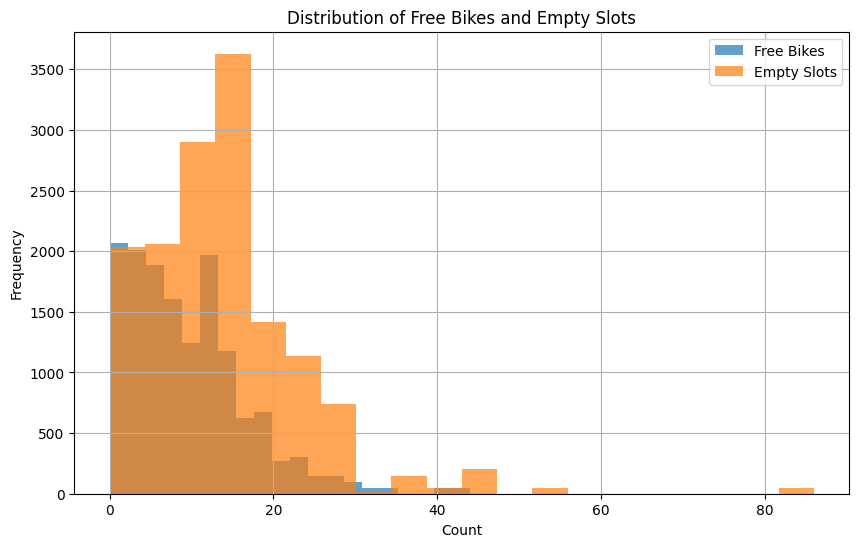

In [124]:
import matplotlib.pyplot as plt

# Histogram for Free Bikes and Empty Slots
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Free_Bikes'], bins=20, alpha=0.7, label='Free Bikes')
plt.hist(merged_df['Empty_Slots'], bins=20, alpha=0.7, label='Empty Slots')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Free Bikes and Empty Slots')
plt.legend()
plt.grid(True)
plt.show()


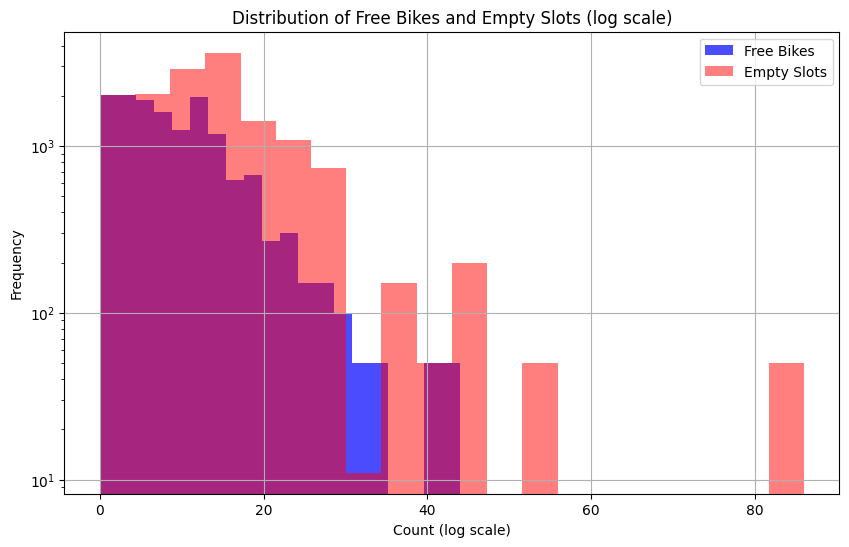

In [32]:
#tried to use log scale to alter the view of data
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Free_Bikes'], bins=20, alpha=0.7, color='blue', label='Free Bikes', log=True)
plt.hist(merged_df['Empty_Slots'], bins=20, alpha=0.5, color='red', label='Empty Slots', log=True)
plt.xlabel('Count (log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Free Bikes and Empty Slots (log scale)')
plt.legend()
plt.grid(True)
plt.show()

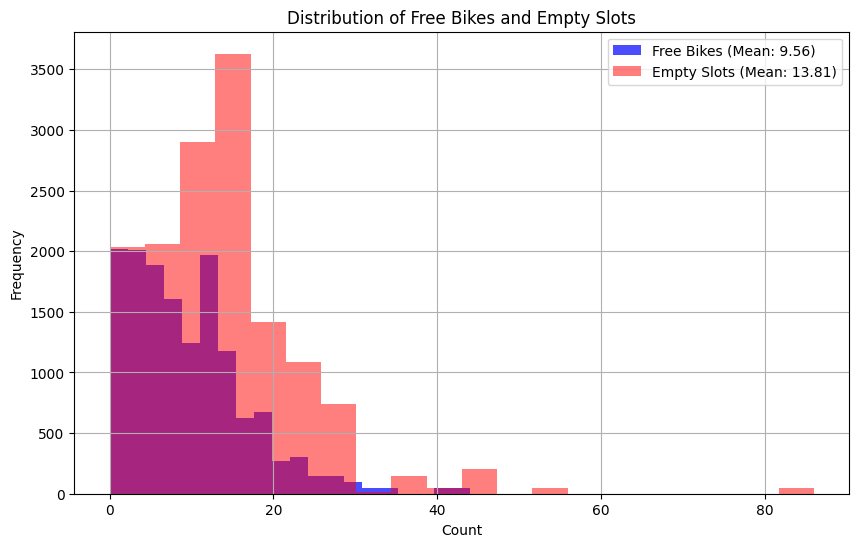

In [33]:
#searching for variables that may show significance
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Free_Bikes'], bins=20, alpha=0.7, color='blue', label=f'Free Bikes (Mean: {merged_df["Free_Bikes"].mean():.2f})')
plt.hist(merged_df['Empty_Slots'], bins=20, alpha=0.5, color='red', label=f'Empty Slots (Mean: {merged_df["Empty_Slots"].mean():.2f})')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Free Bikes and Empty Slots')
plt.legend()
plt.grid(True)
plt.show()

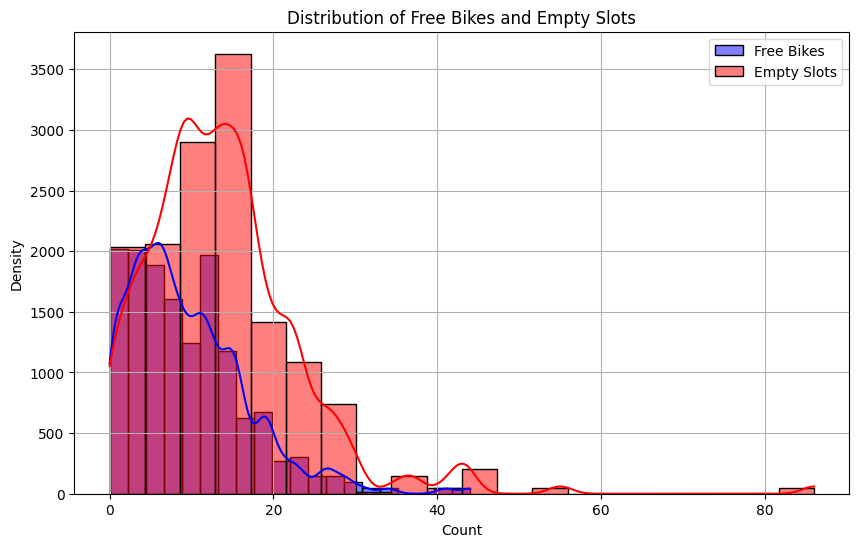

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Free_Bikes'], bins=20, kde=True, color='blue', label='Free Bikes')
sns.histplot(merged_df['Empty_Slots'], bins=20, kde=True, color='red', label='Empty Slots')
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Distribution of Free Bikes and Empty Slots')
plt.legend()
plt.grid(True)
plt.show()

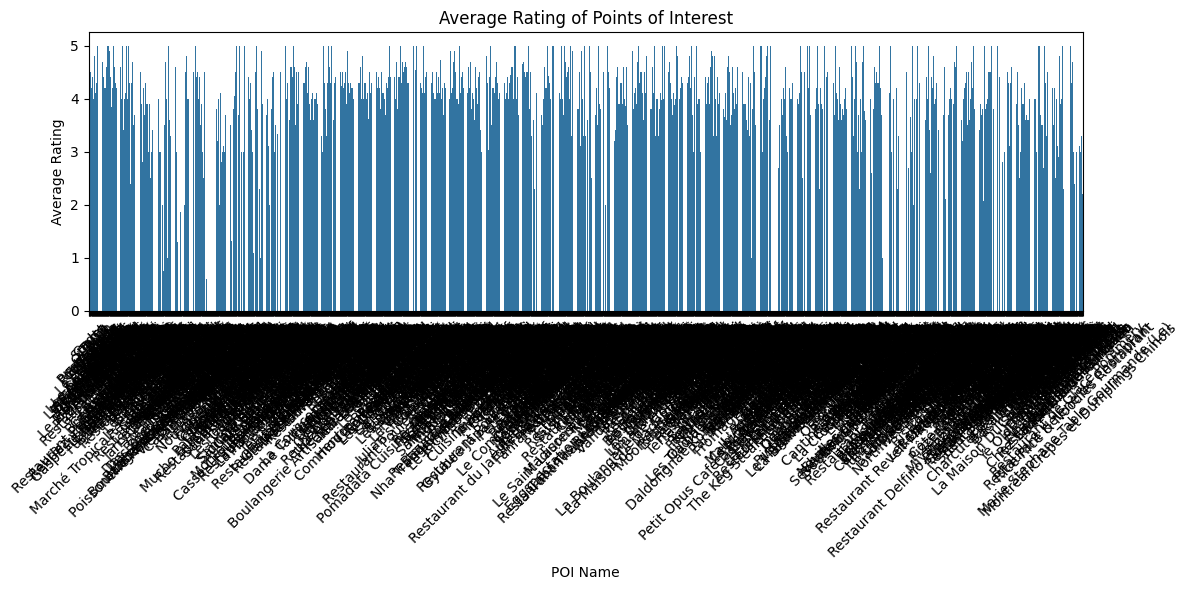

In [31]:
import seaborn as sns
# Bar plot of Average Rating by POI Name
#This was clearly difficult to interpret.
plt.figure(figsize=(12, 6))
sns.barplot(x='POI Name', y='Rating', data=merged_df, errorbar=None)
plt.xticks(rotation=45)
plt.xlabel('POI Name')
plt.ylabel('Average Rating')
plt.title('Average Rating of Points of Interest')
plt.tight_layout()
plt.show()

C:\Users\HAL-9000\AppData\Local\Temp\ipykernel_23420\2609854909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', data=merged_df, palette='viridis')


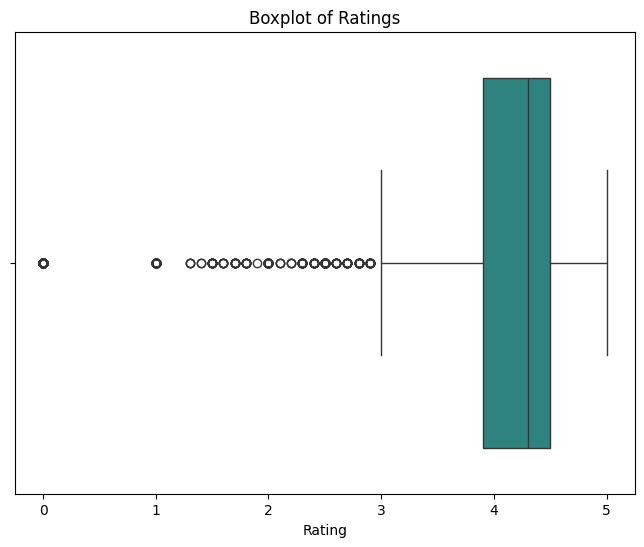

In [37]:
#looking for potential outliers in ratings 
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=merged_df, palette='viridis')
plt.xlabel('Rating')
plt.title('Boxplot of Ratings')
plt.show()

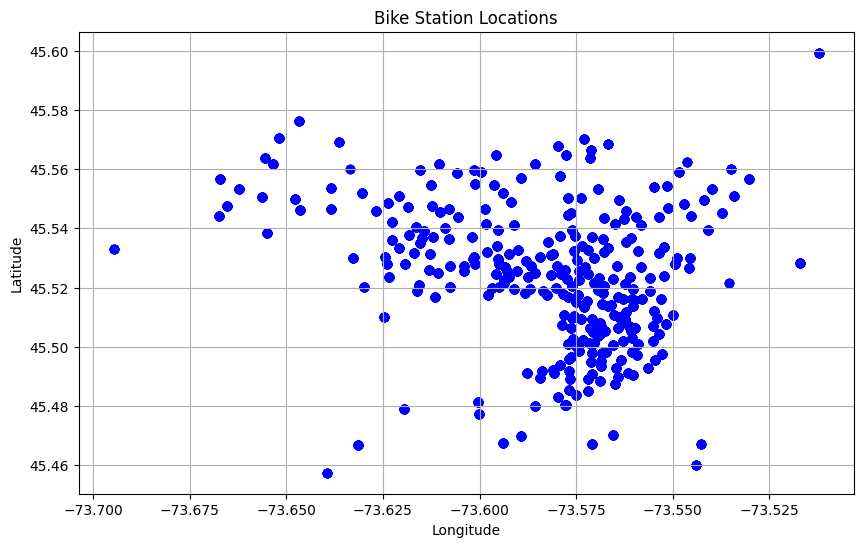

In [28]:
import matplotlib.pyplot as plt

# Scatter plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Longitude'], merged_df['Latitude'], c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Station Locations')
plt.grid(True)
plt.show()

In [132]:
numeric_columns = ['Free_Bikes', 'Latitude', 'Longitude', 'POI Count']

# Calculate correlation matrix
corr_matrix = merged_df[numeric_columns].corr()



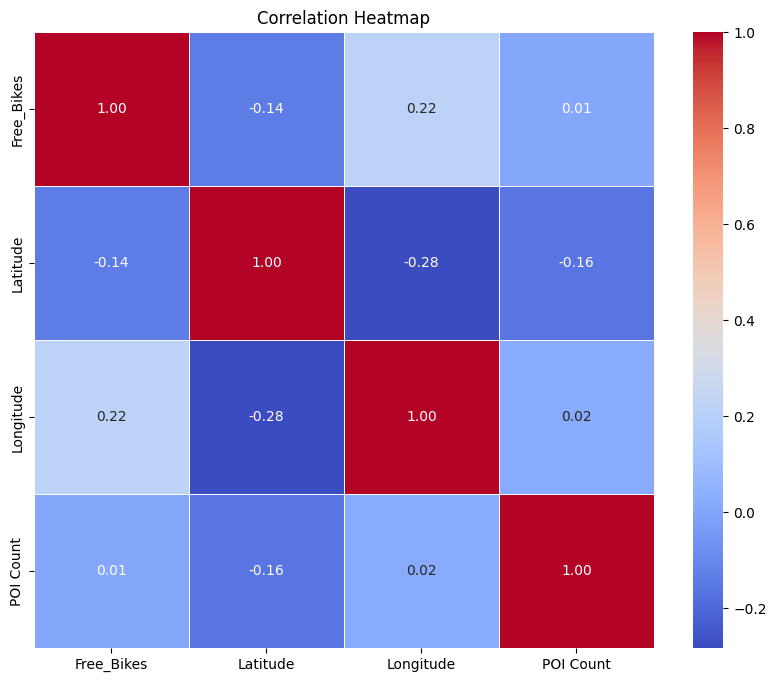

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
#searching for significance and correlation between columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = merged_df[['Free_Bikes', 'Empty_Slots', 'Rating', 'Latitude', 'Longitude']]

#Convert numerical columns to float
data = data.astype({'Free_Bikes': float, 'Empty_Slots': float, 'Rating': float})


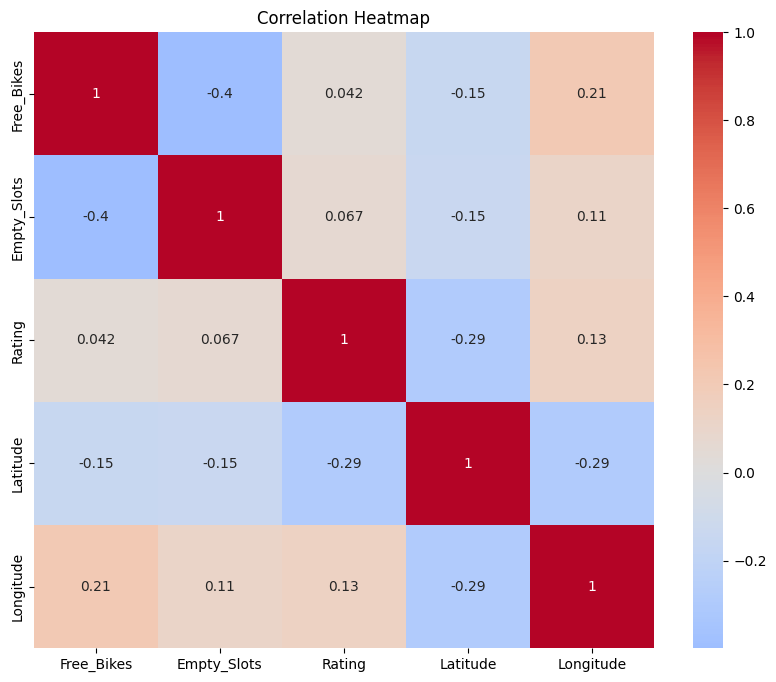

In [26]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()